##  Second Iteration

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

In [181]:
data_df =  pd.read_csv('./VoiceQuality.csv')

In [182]:
data_df.head()

,Unnamed: 0,Operator,IndoorOutdoorTravelling,NetworkType,Rating,CallDropCategory,Latitude,Longitude,StateName
0,0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar


In [183]:
data_df = pd.concat([data_df[['Latitude', 'Longitude', 'Rating','CallDropCategory']],
          pd.get_dummies(data_df[['Operator','IndoorOutdoorTravelling','NetworkType','StateName']])], axis=1)


In [184]:
data_df['CallDropCategory'] = data_df['CallDropCategory'].map({'Satisfactory':1, 'Poor Network':2,'Call Dropped':3,'Poor Voice Quality':4})

In [185]:
data_df.head(10)

,Latitude,Longitude,Rating,CallDropCategory,Operator_Airtel,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_Other,Operator_RComm,...,StateName_Rajasthan,StateName_Samchi,StateName_Samdrup Jongkhar,StateName_Sikkim,StateName_Tamil Nadu,StateName_Telangana,StateName_Tripura,StateName_Uttar Pradesh,StateName_Uttarakhand,StateName_West Bengal
0,28.422966,76.912324,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11.158358,77.301897,4,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,28.422931,76.912253,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.422947,76.912260,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.625990,85.094294,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14.913321,79.993797,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,19.937326,73.536190,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,26.892033,75.725724,4,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,20.287829,85.864832,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9.426251,77.802405,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [186]:
X = data_df.drop(['Rating', 'CallDropCategory'], axis=1)

In [187]:
y = data_df['CallDropCategory']

In [188]:
# split dataset into train and test data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [189]:
# instantiate learning model (k = 3)
KNNModel = KNeighborsClassifier(n_neighbors=17)

In [190]:
# fitting the model
KNNModel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [191]:
# predict the response
prediction = KNNModel.predict(X_test)

In [192]:
# predict the response
metrics.accuracy_score(y_test, prediction)

0.7713559052614847

### Evaluating the KNN Algorithm using  confusion  matrix

In [193]:
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))
## 'Satisfactory':1, 'Poor Network':2,'Call Dropped':3,'Poor Voice Quality':4

[[22042   337   146   236]
 [ 2326  1131   139   171]
 [ 1683   183   505    56]
 [ 1574   293    48   585]]
             precision    recall  f1-score   support

          1       0.80      0.97      0.87     22761
          2       0.58      0.30      0.40      3767
          3       0.60      0.21      0.31      2427
          4       0.56      0.23      0.33      2500

avg / total       0.74      0.77      0.73     31455



### Search for an optimal value of K   of  best  fit  our  KNN  model

In [150]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 20)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

Text(0,0.5,'Cross-validated accuracy')

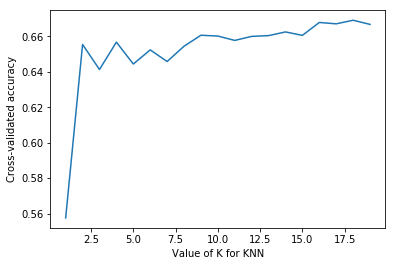

In [149]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

##### From  above  we  can  tell  that  17-  18  is  best  optimal  k value  to  fit  our  model

### Comparing Error Rate with the K Value

##### calculate the mean of error for all the predicted values where K ranges from 1 and 20

In [154]:
error = []

# Calculating error for K values between 1 and 
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

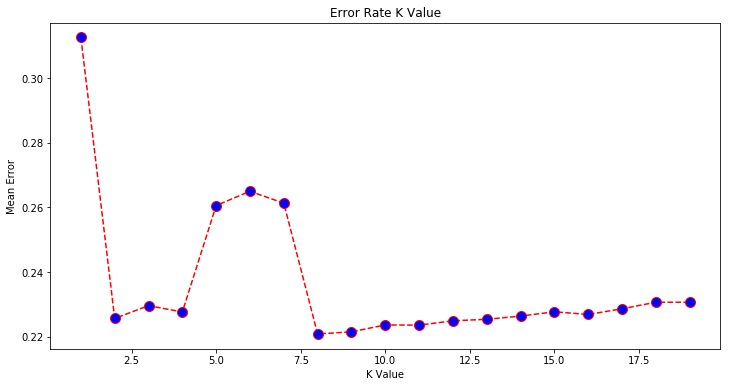

In [152]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

##### From the output we can see that the mean error is  0.22  when the value of the K is between 7.5 and  mean error is 0.23 when K  value is 17